In [1]:
from run_pygad_variable_pop_mp import * 
from multiprocessing import Pool
import glob
import seaborn as sns
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [124]:
# PAH 
loc = '/grid/home/nbourgeois/data/test_proteins/pah/pah.pep.fas' #sequence pep.fas Input

(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pah_seq=str(seqs[0])
    
# PAH targets
loc = '/grid/home/nbourgeois/data/test_proteins/pah/MMUT.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pahtar_seq1=str(seqs[0])
    
loc = '/grid/home/nbourgeois/data/test_proteins/pah/OTC.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pahtar_seq2=str(seqs[0])
    
loc = '/grid/home/nbourgeois/data/test_proteins/pah/ATP7B.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pahtar_seq3=str(seqs[0])
    

#hidua
loc = '/grid/home/nbourgeois/data/test_proteins/hidua/hidua.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    hidua_seq=str(seqs[0])
    
prefixes = ['3h_pah','3h_MMUT','3h_OTC','3h_ATP7B','3h_hidua']
proteins = [pah_seq,pahtar_seq1,pahtar_seq2,pahtar_seq3,hidua_seq]
len_dict = {}
for i in range(5): len_dict[prefixes[i]] = len(proteins[i])
tissues = ['Liver','Liver','Liver','Liver','Brain_Cerebellum']

In [125]:
len_dict

{'3h_pah': 452,
 '3h_MMUT': 751,
 '3h_OTC': 355,
 '3h_ATP7B': 1259,
 '3h_hidua': 654}

In [23]:
combinations = []
# populations = [10,20,30,40,50,75,100,150,200]
populations = [500,1000,1500,2000,2500]
for prefix, aa_seq, tissue in zip(prefixes, proteins, tissues):
    for population in populations:
        combinations.append((prefix,aa_seq,tissue,population))

In [24]:
def multi_GA_wrapper(args):
    return run_GA_comb(*args)

def run_GA_comb(prefix,aa_seq,tissue,population):
    print(prefix+str(population),'\n')
    filename = prefix+str(population)+'.csv'
    timefit = run_GA(aa_seq, 
           tissue, 
           filename, 
           population_size=20,
           cai_on = True, 
           bai_on = True, 
           cpg_on = True)
    pd.DataFrame(timefit).to_csv(filename,index=False)
    

In [25]:
def find_prefix(prefixes,word):
    for prefix in prefixes:
        loc = word.find(prefix)
        if (loc != -1):
            ind = loc + len(prefix)
            return ind
    print('error', prefix)
    return(-1)

In [26]:
find_prefix(prefixes,'3h_pah25')
'3h_pah25'[:6]

'3h_pah'

In [27]:
# files = glob.glob('3h*.csv')
# files
prefixes

['3h_pah', '3h_MMUT', '3h_OTC', '3h_ATP7B', '3h_hidua']

In [28]:
files = glob.glob('3h*.csv')
df_list = []
for afile in files:
    print(afile)
    temp_df = pd.read_csv(afile, names = ['Time','Fitness'])

    file_id = afile.split('.')[0]
    ind = find_prefix(prefixes,file_id)
    prefix = file_id[:ind]
    pop = file_id[ind:]
    
    temp_df['Protein'] = prefix
    temp_df['Population'] = pop
    
    df_list.append(temp_df )
    
    
    
    
    

3h_pah25.csv
3h_OTC25.csv
3h_pah50.csv
3h_hidua75.csv
3h_OTC75.csv
3h_MMUT100.csv
3h_pah150.csv
3h_OTC150.csv
3h_MMUT200.csv
3h_hidua500.csv
3h_MMUT25.csv
3h_MMUT50.csv
3h_pah75.csv
3h_hidua100.csv
3h_ATP7B100.csv
3h_MMUT150.csv
3h_hidua200.csv
3h_ATP7B200.csv
3h_hidua50.csv
3h_OTC50.csv
3h_ATP7B75.csv
3h_pah100.csv
3h_hidua150.csv
3h_ATP7B150.csv
3h_pah200.csv
3h_OTC200.csv
3h_pah500.csv
3h_hidua25.csv
3h_ATP7B25.csv
3h_ATP7B50.csv
3h_MMUT75.csv
3h_OTC100.csv
3h_MMUT500.csv
3h_ATP7B500.csv
3h_OTC500.csv
3h_hidua1000.csv
3h_pah1000.csv
3h_MMUT1000.csv
3h_ATP7B1000.csv
3h_OTC1000.csv
3h_hidua1500.csv
3h_pah1500.csv
3h_MMUT1500.csv
3h_ATP7B1500.csv
3h_OTC1500.csv
3h_hidua2000.csv
3h_pah2000.csv
3h_MMUT2000.csv
3h_ATP7B2000.csv
3h_OTC2000.csv
3h_hidua2500.csv
3h_pah2500.csv
3h_MMUT2500.csv
3h_ATP7B2500.csv
3h_OTC2500.csv
3h_hidua5000.csv
3h_pah5000.csv
3h_MMUT5000.csv
3h_ATP7B5000.csv
3h_OTC5000.csv
3h_hidua10000.csv
3h_pah10000.csv
3h_MMUT10000.csv
3h_ATP7B10000.csv
3h_OTC10000.csv


In [29]:
temp_df

,Time,Fitness,Protein,Population
0,0.000000,1.000000,3h_OTC,10000
1,13.965762,0.646056,3h_OTC,10000
2,15.944432,0.656474,3h_OTC,10000
3,17.963847,0.664759,3h_OTC,10000
4,19.759589,0.673936,3h_OTC,10000
...,...,...,...,...
6253,10794.275147,0.880066,3h_OTC,10000
6254,10795.913476,0.880066,3h_OTC,10000
6255,10797.514105,0.880066,3h_OTC,10000
6256,10799.116712,0.880066,3h_OTC,10000


In [135]:
df = pd.concat(df_list)
df = df.astype({'Population': 'int32'})
df['Pop_len'] = df['Population'] / df['Protein'].map(len_dict)
df = df.sort_values(['Population','Time'])
df = df.astype({'Population': 'str'})
df = df.astype({'Pop_len': 'str'})
df = df.loc[df['Fitness']<2]
df = df.loc[df['Time']>0]


In [86]:
interval = 60
start = 0
end = df['Time'].max()
dfs=[]
while(start <= end-1):
    stop = min(end,start + interval)
    if stop%6000 == 0:
        print(start)
    df_sub = df.loc[df['Time'].between(0, stop, inclusive='left')]
    means = df_sub.groupby(['Protein','Population'])['Fitness'].mean()
    medians = pd.DataFrame(means).reset_index().groupby('Population')['Fitness'].median()
    temp_df = pd.DataFrame(data={'Population':medians.index.values,'Fitness':medians.values,'Time':stop})
    dfs.append(temp_df)
    start = start + interval

ERROR! Session/line number was not unique in database. History logging moved to new session 2490
5940


In [89]:
end = df['Time'].max()
end

10800.19703745842

In [96]:
med_df = pd.concat(dfs)
med_df

,Population,Fitness,Time
0,100,0.816862,60
1,1000,0.804751,60
2,10000,0.718788,60
3,150,0.816176,60
4,1500,0.791274,60
...,...,...,...
8,2500,0.877787,10800
9,50,0.874447,10800
10,500,0.880526,10800
11,5000,0.875947,10800


ERROR! Session/line number was not unique in database. History logging moved to new session 2492


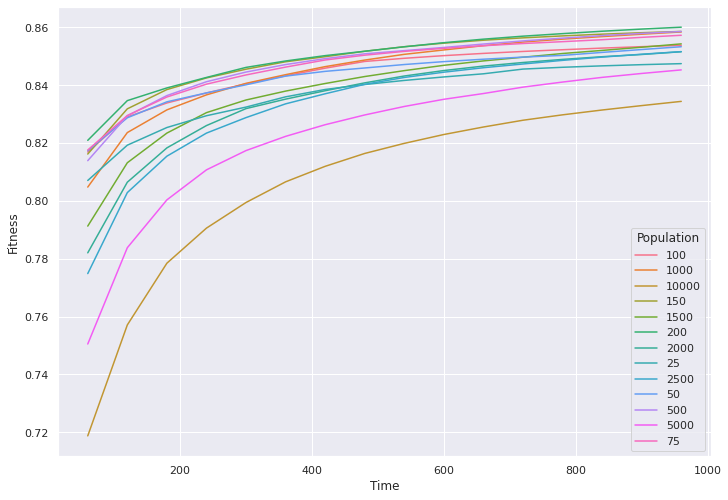

In [97]:
med_df_beg = med_df.loc[med_df['Time'] < 1000]

med_df_beg = med_df_beg.reset_index(drop=True)
ax = sns.lineplot(data=med_df_beg, x="Time", y="Fitness", hue="Population")
plt.show()

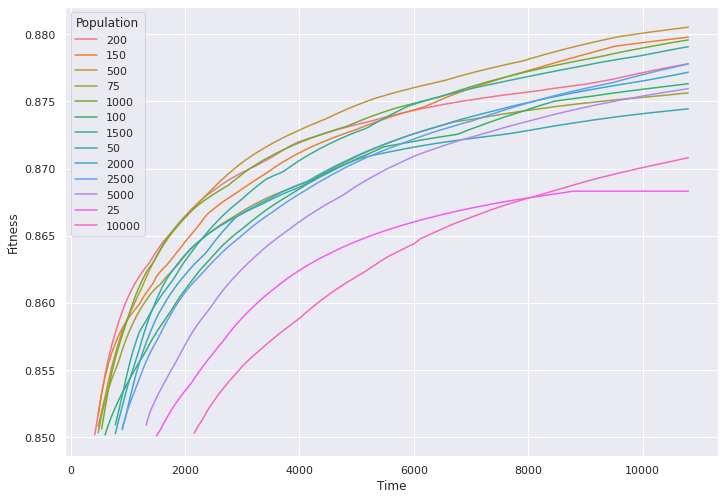

In [100]:
med_df_high = med_df.loc[med_df['Fitness'] > .85]

med_df_high = med_df_high.reset_index(drop=True)
ax = sns.lineplot(data=med_df_high, x="Time", y="Fitness", hue="Population")
plt.show()

In [107]:
remove = ['75','10000','5000','50','25']
med_df_filt = med_df.loc[~med_df['Population'].isin(remove)]
med_df_filt['Population'].unique()

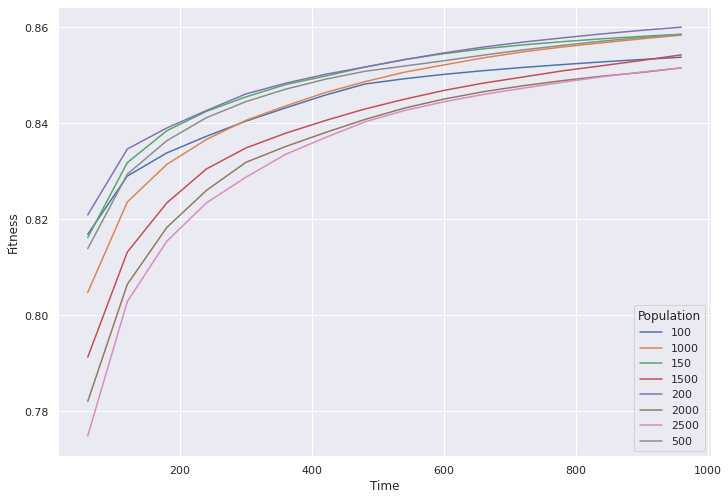

In [110]:
med_df_beg = med_df_filt.loc[med_df_filt['Time'] < 1000]

med_df_beg = med_df_beg.reset_index(drop=True)
ax = sns.lineplot(data=med_df_beg, x="Time", y="Fitness", hue="Population")
plt.show()

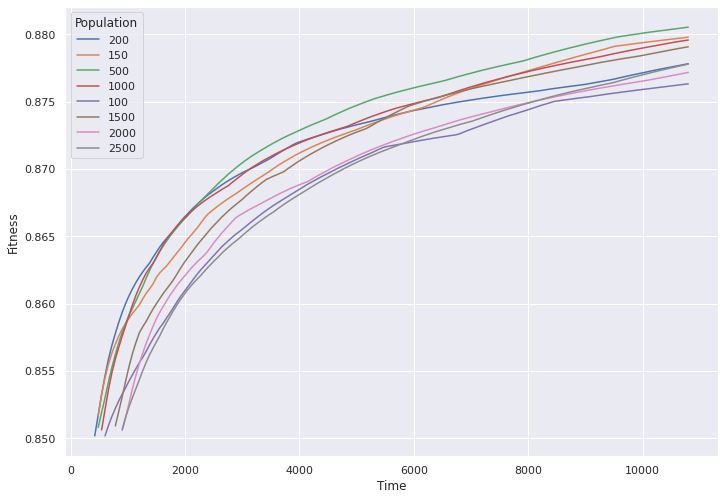

In [111]:
med_df_high = med_df_filt.loc[med_df_filt['Fitness'] > .85]

med_df_high = med_df_high.reset_index(drop=True)
ax = sns.lineplot(data=med_df_high, x="Time", y="Fitness", hue="Population")
plt.show()

,Time,Fitness,Protein,Population
1,0.618786,0.632474,3h_ATP7B,25
1,0.629405,0.627513,3h_pah,25
2,0.630732,0.634078,3h_ATP7B,25
1,0.631213,0.625535,3h_OTC,25
2,0.640633,0.627625,3h_pah,25
...,...,...,...,...
6325,10799.092098,0.881269,3h_hidua,10000
6256,10799.116712,0.880066,3h_OTC,10000
6277,10799.934913,0.884276,3h_ATP7B,10000
5603,10799.963620,0.881517,3h_MMUT,10000


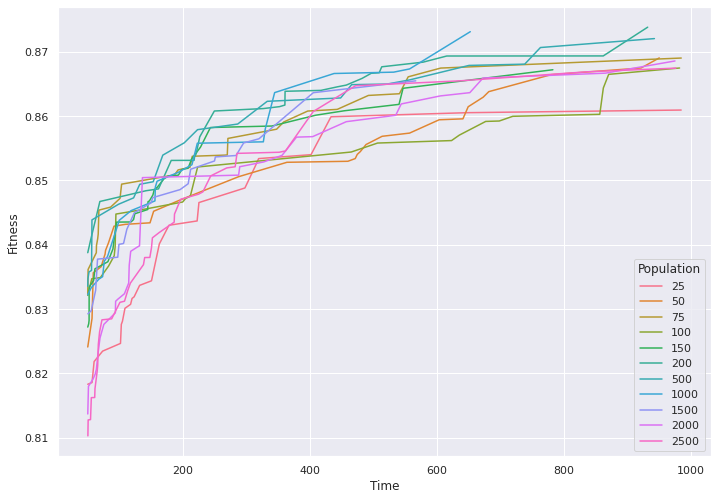

In [ ]:
for protein in df['Protein'].unique():
    df_pah = df.loc[df['Protein']==protein]
    remove = ['10000','5000',]
    df_pah = df_pah.loc[~df_pah['Population'].isin(remove)]
    df_pah = df_pah.loc[df_pah['Time'] > 50]
    df_pah = df_pah.loc[df_pah['Time'] < 1000]
    df_pah = df_pah.loc[df_pah['Fitness'] > .8]

    df_pah = df_pah.drop_duplicates(subset=['Fitness'], keep='first')
    df_pah = df_pah.reset_index(drop=True)
    ax = sns.lineplot(data=df_pah, x="Time", y="Fitness", hue="Population")
    plt.show()

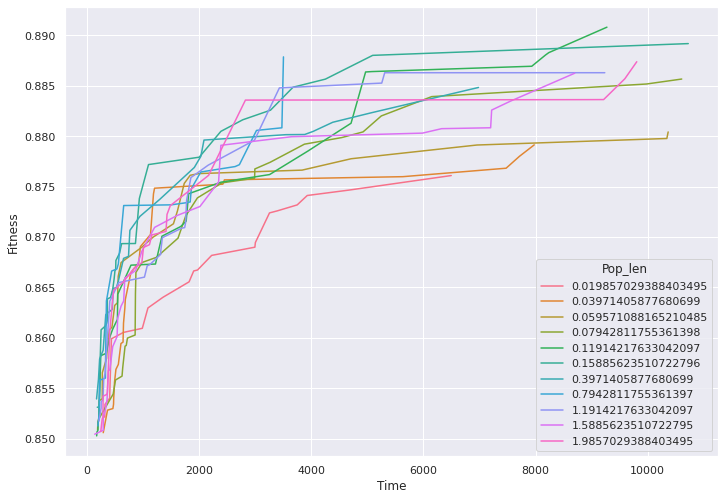

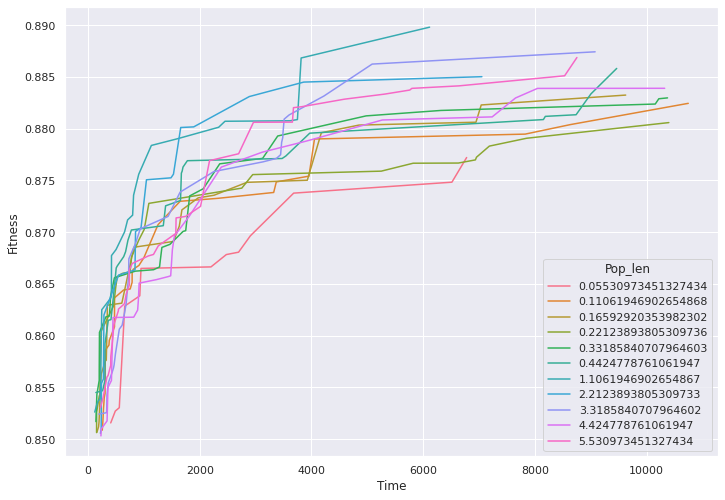

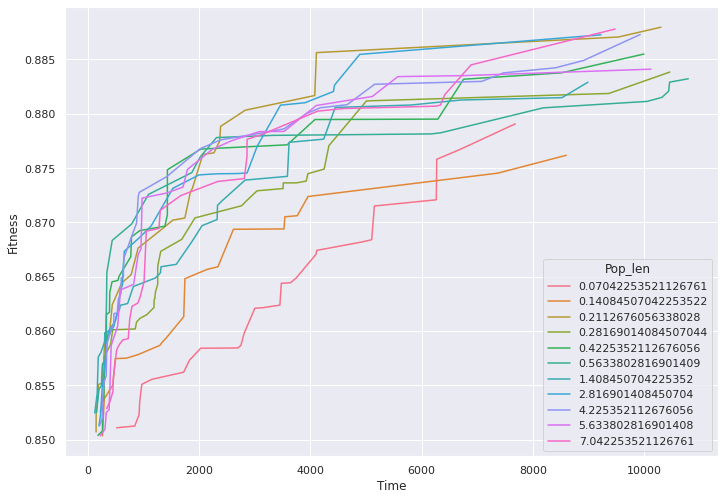

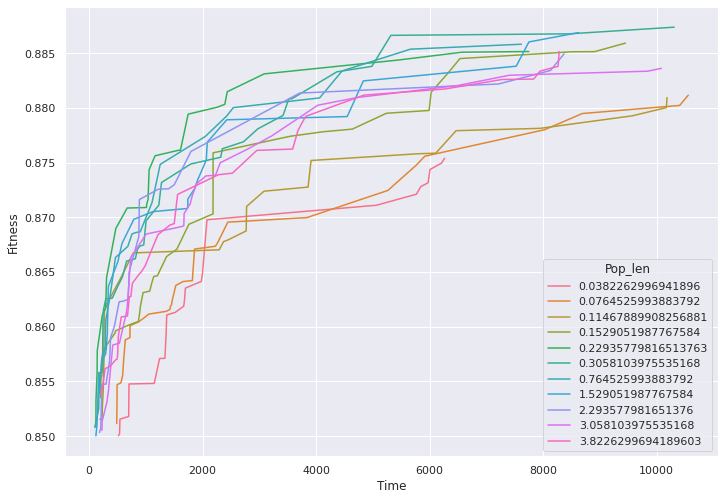

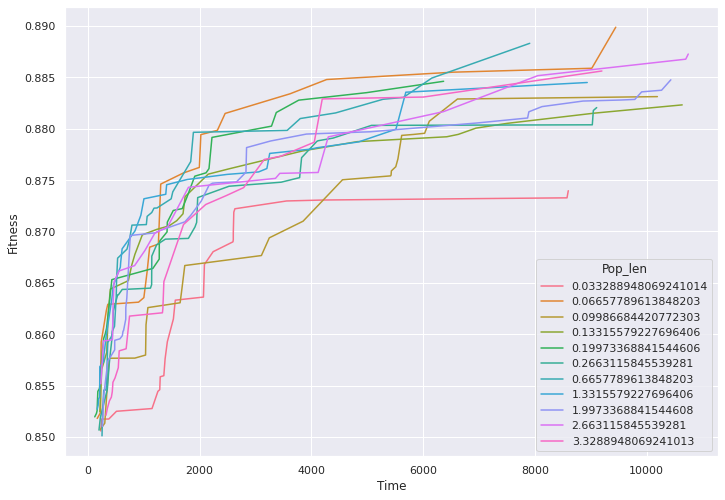

In [139]:
for protein in df['Protein'].unique():
    df_pah = df.loc[df['Protein']==protein]
    remove = ['10000','5000',]
    df_pah = df_pah.loc[~df_pah['Population'].isin(remove)]
    df_pah = df_pah.loc[df_pah['Time'] > 50]
    df_pah = df_pah.loc[df_pah['Fitness'] > .85]

    df_pah = df_pah.drop_duplicates(subset=['Fitness'], keep='first')
    df_pah = df_pah.reset_index(drop=True)
    ax = sns.lineplot(data=df_pah, x="Time", y="Fitness", hue="Pop_len")
    plt.show()